In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Taken from sklearn docs 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [3]:
def prune(decisiontree, min_samples_leaf = 1):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1

In [4]:
trainSet = pd.read_csv('dota2Train.csv')
testSet = pd.read_csv('dota2Test.csv')

x = trainSet.drop('-1', 1)
y = trainSet['-1']
testX = testSet.drop('-1', 1)
testY = testSet['-1']

trainSet.head()

# pd.get_dummies(trainSet)

,-1,223,2,2.1,0,0.1,0.2,0.3,0.4,0.5,...,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1


In [5]:
print y.value_counts()

 1    48782
-1    43867
Name: -1, dtype: int64


In [19]:
# Decision Tree Zone
dt = DecisionTreeClassifier(splitter='best', presort = False, min_impurity_decrease= 0.1, min_samples_leaf = 1)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# parameters = {'splitter':('best', 'random')}
# parameters = {'presort':(True, False)}
# parameters = {'min_impurity_decrease': (np.arange(0.0, 1.01, 0.1))}
# parameters = {'min_samples_split': (np.arange(10, 210, 10))}
parameters = {'min_samples_leaf': (np.arange(1, 11))}
dtGS = GridSearchCV(dt, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
dtGS.fit(x, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.530760928225, total=   0.5s
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.527037236913, total=   0.4s
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.531516459795, total=   0.3s
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.530275229358, total=   0.4s
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.530275229358, total=   0.3s


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s


[CV] min_samples_leaf=2 ..............................................
[CV] ......... min_samples_leaf=2, score=0.530760928225, total=   0.4s
[CV] min_samples_leaf=2 ..............................................
[CV] ......... min_samples_leaf=2, score=0.527037236913, total=   0.2s
[CV] min_samples_leaf=2 ..............................................
[CV] ......... min_samples_leaf=2, score=0.531516459795, total=   0.2s
[CV] min_samples_leaf=2 ..............................................
[CV] ......... min_samples_leaf=2, score=0.530275229358, total=   0.3s
[CV] min_samples_leaf=2 ..............................................
[CV] ......... min_samples_leaf=2, score=0.530275229358, total=   0.3s


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.2s


[CV] min_samples_leaf=3 ..............................................
[CV] ......... min_samples_leaf=3, score=0.530760928225, total=   0.3s
[CV] min_samples_leaf=3 ..............................................
[CV] ......... min_samples_leaf=3, score=0.527037236913, total=   0.3s
[CV] min_samples_leaf=3 ..............................................
[CV] ......... min_samples_leaf=3, score=0.531516459795, total=   0.3s
[CV] min_samples_leaf=3 ..............................................
[CV] ......... min_samples_leaf=3, score=0.530275229358, total=   0.2s
[CV] min_samples_leaf=3 ..............................................
[CV] ......... min_samples_leaf=3, score=0.530275229358, total=   0.3s
[CV] min_samples_leaf=4 ..............................................
[CV] ......... min_samples_leaf=4, score=0.530760928225, total=   0.3s
[CV] min_samples_leaf=4 ..............................................
[CV] ......... min_samples_leaf=4, score=0.527037236913, total=   0.3s


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.8s


[CV] min_samples_leaf=4 ..............................................
[CV] ......... min_samples_leaf=4, score=0.531516459795, total=   0.3s
[CV] min_samples_leaf=4 ..............................................
[CV] ......... min_samples_leaf=4, score=0.530275229358, total=   0.2s
[CV] min_samples_leaf=4 ..............................................
[CV] ......... min_samples_leaf=4, score=0.530275229358, total=   0.2s
[CV] min_samples_leaf=5 ..............................................
[CV] ......... min_samples_leaf=5, score=0.530760928225, total=   0.2s
[CV] min_samples_leaf=5 ..............................................
[CV] ......... min_samples_leaf=5, score=0.527037236913, total=   0.2s
[CV] min_samples_leaf=5 ..............................................
[CV] ......... min_samples_leaf=5, score=0.531516459795, total=   0.2s
[CV] min_samples_leaf=5 ..............................................
[CV] ......... min_samples_leaf=5, score=0.530275229358, total=   0.2s


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   23.4s


[CV] min_samples_leaf=5 ..............................................
[CV] ......... min_samples_leaf=5, score=0.530275229358, total=   0.2s
[CV] min_samples_leaf=6 ..............................................
[CV] ......... min_samples_leaf=6, score=0.530760928225, total=   0.2s
[CV] min_samples_leaf=6 ..............................................
[CV] ......... min_samples_leaf=6, score=0.527037236913, total=   0.2s
[CV] min_samples_leaf=6 ..............................................
[CV] ......... min_samples_leaf=6, score=0.531516459795, total=   0.3s
[CV] min_samples_leaf=6 ..............................................
[CV] ......... min_samples_leaf=6, score=0.530275229358, total=   0.3s
[CV] min_samples_leaf=6 ..............................................
[CV] ......... min_samples_leaf=6, score=0.530275229358, total=   0.3s
[CV] min_samples_leaf=7 ..............................................
[CV] ......... min_samples_leaf=7, score=0.530760928225, total=   0.2s
[CV] m

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.6s


[CV] min_samples_leaf=7 ..............................................
[CV] ......... min_samples_leaf=7, score=0.530275229358, total=   0.2s
[CV] min_samples_leaf=7 ..............................................
[CV] ......... min_samples_leaf=7, score=0.530275229358, total=   0.2s
[CV] min_samples_leaf=8 ..............................................
[CV] ......... min_samples_leaf=8, score=0.530760928225, total=   0.2s
[CV] min_samples_leaf=8 ..............................................
[CV] ......... min_samples_leaf=8, score=0.527037236913, total=   0.2s
[CV] min_samples_leaf=8 ..............................................
[CV] ......... min_samples_leaf=8, score=0.531516459795, total=   0.3s
[CV] min_samples_leaf=8 ..............................................
[CV] ......... min_samples_leaf=8, score=0.530275229358, total=   0.3s
[CV] min_samples_leaf=8 ..............................................
[CV] ......... min_samples_leaf=8, score=0.530275229358, total=   0.2s
[CV] m

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.6s


[CV] min_samples_leaf=9 ..............................................
[CV] ......... min_samples_leaf=9, score=0.531516459795, total=   0.2s
[CV] min_samples_leaf=9 ..............................................
[CV] ......... min_samples_leaf=9, score=0.530275229358, total=   0.2s
[CV] min_samples_leaf=9 ..............................................
[CV] ......... min_samples_leaf=9, score=0.530275229358, total=   0.2s
[CV] min_samples_leaf=10 .............................................
[CV] ........ min_samples_leaf=10, score=0.530760928225, total=   0.3s
[CV] min_samples_leaf=10 .............................................
[CV] ........ min_samples_leaf=10, score=0.527037236913, total=   0.3s
[CV] min_samples_leaf=10 .............................................
[CV] ........ min_samples_leaf=10, score=0.531516459795, total=   0.2s
[CV] min_samples_leaf=10 .............................................
[CV] ........ min_samples_leaf=10, score=0.530275229358, total=   0.2s
[CV] m

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   46.8s finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.1, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [21]:
print(dtGS.best_score_)
print(dtGS.best_estimator_.min_samples_leaf)
print dtGS.cv_results_['mean_test_score']
print dtGS.cv_results_['mean_train_score']

0.52997301673
1
[ 0.52997302  0.52997302  0.52997302  0.52997302  0.52997302  0.52997302
  0.52997302  0.52997302  0.52997302  0.52997302]
[ 0.52566279  0.52566279  0.52566279  0.52566279  0.52566279  0.52566279
  0.52566279  0.52566279  0.52566279  0.52566279]


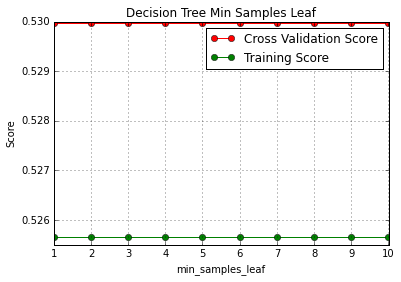

In [22]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("Decision Tree Min Samples Leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Score")

plt.grid()

plt.plot(dtGS.param_grid['min_samples_leaf'], dtGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
plt.plot(dtGS.param_grid['min_samples_leaf'], dtGS.cv_results_['mean_train_score'], 'o-', color="g",
         label="Training Score")
plt.legend(loc="best")

In [25]:
# Pruning evaluator
testScoreArray = []
trainScoreArray = []
bestScore = 0.0
index = -1
for i in range(10, 2010, 10):
    dt = DecisionTreeClassifier(splitter='best', presort = False, min_impurity_decrease= 0.1, min_samples_leaf = 1)
    dt.fit(x, y)
    prune(dt, i)
    
    trainDtPred = dt.predict(x)
    trainDtPred = pd.DataFrame(data=trainDtPred, columns=['hand'])
    trainAcc = accuracy_score(y, trainDtPred)
    
    testDtPred = dt.predict(testX)
    testDtPred = pd.DataFrame(data=testDtPred, columns=['hand'])
    testAcc = accuracy_score(testY, testDtPred)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArray.append(trainAcc)
    testScoreArray.append(testAcc)
print bestScore
print index

0.534538035558
10


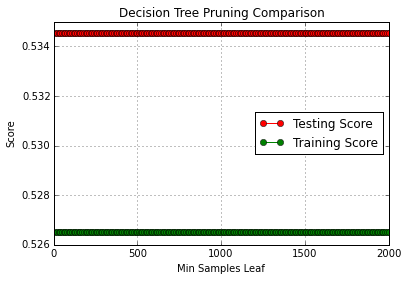

In [31]:
# Pruning Grapher
plt.figure()
plt.title("Decision Tree Pruning Comparison")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(np.arange(10, 2010, 10), testScoreArray, 'o-', color="r", label = "Testing Score")
plt.plot(np.arange(10, 2010, 10), trainScoreArray, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

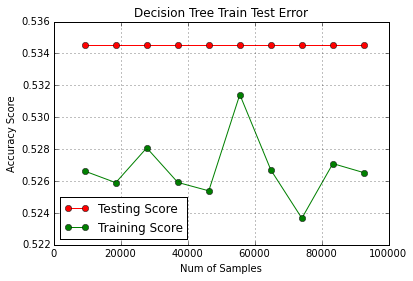

In [12]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = x
    yTrainRound = y
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(x, y, test_size=i/10.0)
    
    dt = DecisionTreeClassifier(splitter='best', presort = False, min_impurity_decrease= 0.1, min_samples_leaf = 1)
    dt.fit(xTrainRound, yTrainRound)
    prune(dt, 10)
    
    trainPredRes = dt.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = dt.predict(testX)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(testY, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("Decision Tree Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [9]:
#Detailed d-tree results
dt = DecisionTreeClassifier(splitter='best', presort = False, min_impurity_decrease= 0.1, min_samples_leaf = 1)
dt.fit(x, y)
prune(dt, 10)

dtPredicted = dt.predict(testX)
print metrics.classification_report(testY, dtPredicted)
dtPredicted = pd.DataFrame(data=dtPredicted, columns=['team'])
print dtPredicted.team.value_counts()

1    10293
Name: team, dtype: int64


In [6]:
# Code here is the algorithm tuning zone for the MLP
# Don't run if not needed, the commented out parameters are the ones I tuned
# These take hours to ru
n

mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# parameters = {'activation':('identity', 'logistic', 'tanh', 'relu')}
# parameters = {'learning_rate' :('constant', 'invscaling', 'adaptive')}
# parameters = {'max_iter': (np.arange(100, 1100, 100))}
# parameters = {'hidden_layer_sizes' : ((100,), (200,), (300,), (400,), (500,), (600,),(700,),(800,),(900,))}
# parameters = {'alpha': (np.arange(0.0001, 0.001, 0.0001))}
mlpGS = GridSearchCV(mlp, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
mlpGS.fit(x, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] alpha=0.0001 ....................................................
[CV] alpha=0.0001 ....................................................
[CV] alpha=0.0001 ....................................................
[CV] alpha=0.0001 ....................................................
[CV] ............... alpha=0.0001, score=0.598704803022, total=  23.7s
[CV] alpha=0.0001 ....................................................
[CV] ............... alpha=0.0001, score=0.593200215866, total=  36.6s
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0002, score=0.595520777118, total=  20.2s
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0001, score=0.598974635726, total= 1.3min
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0002, score=0.603399892067, total=  20.0s
[CV] alpha=0.0002

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.4min


[CV] ............... alpha=0.0001, score=0.595358877496, total=  57.7s
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0002, score=0.578359417161, total=  16.6s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0002, score=0.601187263896, total=  26.0s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0002, score=0.603939557474, total=  34.8s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0003, score=0.592444684296, total=  24.1s
[CV] alpha=0.0003 ....................................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.2min


[CV] ............... alpha=0.0003, score=0.603399892067, total=  22.1s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0003, score=0.599190501889, total=  33.5s
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0003, score=0.606422018349, total=  19.4s
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0003, score=0.601780895845, total=  30.3s
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0004, score=0.603399892067, total=  23.1s
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0004, score=0.599352401511, total=  28.9s
[CV] alpha=0.0004 ....................................................
[CV] ................ alpha=0.0004, score=0.59422558014, total=  37.7s


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.2min


[CV] alpha=0.0005 ....................................................
[CV] ............... alpha=0.0004, score=0.598381003778, total=  13.8s
[CV] alpha=0.0005 ....................................................
[CV] ............... alpha=0.0004, score=0.600377765785, total=  19.7s
[CV] alpha=0.0005 ....................................................
[CV] ............... alpha=0.0005, score=0.602482460874, total=  17.6s
[CV] alpha=0.0005 ....................................................
[CV] ............... alpha=0.0005, score=0.592660550459, total=  22.4s
[CV] alpha=0.0005 ....................................................


/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ............... alpha=0.0001, score=0.583648138154, total= 3.8min
[CV] alpha=0.0006 ....................................................
[CV] ................. alpha=0.0005, score=0.6058283864, total=  18.5s
[CV] ............... alpha=0.0005, score=0.599892066919, total=  16.8s
[CV] ................ alpha=0.0005, score=0.60361575823, total=  14.5s


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.9min


[CV] alpha=0.0006 ....................................................
[CV] alpha=0.0006 ....................................................
[CV] alpha=0.0006 ....................................................
[CV] ............... alpha=0.0006, score=0.604263356719, total=  23.0s
[CV] alpha=0.0006 ....................................................
[CV] ............... alpha=0.0006, score=0.591958985429, total=  25.2s
[CV] alpha=0.0007 ....................................................
[CV] ............... alpha=0.0006, score=0.598596869941, total=  31.8s
[CV] alpha=0.0007 ....................................................
[CV] ............... alpha=0.0007, score=0.594117647059, total=  14.3s
[CV] alpha=0.0007 ....................................................
[CV] ............... alpha=0.0006, score=0.600971397733, total=  42.9s
[CV] alpha=0.0007 ....................................................
[CV] ............... alpha=0.0006, score=0.603130059363, total=  24.1s
[CV] a

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.9min


[CV] ............... alpha=0.0007, score=0.603885590934, total=  29.5s
[CV] alpha=0.0008 ....................................................
[CV] ............... alpha=0.0008, score=0.589476524555, total=  12.3s
[CV] alpha=0.0008 ....................................................
[CV] ............... alpha=0.0007, score=0.598920669185, total=  27.4s
[CV] alpha=0.0008 ....................................................
[CV] ............... alpha=0.0008, score=0.605180787911, total=  14.8s
[CV] alpha=0.0009 ....................................................
[CV] ............... alpha=0.0008, score=0.601079330815, total=  22.3s
[CV] alpha=0.0009 ....................................................
[CV] ............... alpha=0.0008, score=0.599676200756, total=  16.9s
[CV] alpha=0.0009 ....................................................
[CV] ............... alpha=0.0008, score=0.597463572585, total=  24.1s
[CV] alpha=0.0009 ....................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:  5.7min remaining:   15.8s


[CV] ............... alpha=0.0009, score=0.598488936859, total=   7.6s
[CV] ............... alpha=0.0009, score=0.598866702644, total=  20.1s


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.8min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([ 0.0001,  0.0002,  0.0003,  0.0004,  0.0005,  0.0006,  0.0007,
        0.0008,  0.0009])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [9]:
# Printing out best estimators for each variable, I change these manually everytime
print(mlpGS.best_score_)
print(mlpGS.best_estimator_.alpha)

0.600895844576
0.0005


/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


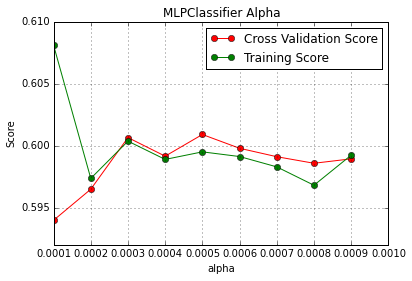

In [10]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("MLPClassifier Alpha")
plt.xlabel("alpha")
plt.ylabel("Score")

plt.grid()

plt.plot(mlpGS.param_grid['alpha'], mlpGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
plt.plot(mlpGS.param_grid['alpha'], mlpGS.cv_results_['mean_train_score'], 'o-', color="g",
         label="Training Score")
plt.legend(loc="best")

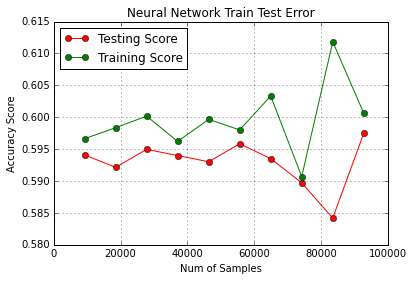

In [11]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = x
    yTrainRound = y
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(x, y, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(testX)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(testY, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("Neural Network Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# MLP detailed results
mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
mlp.fit(x, y)

mlpPredicted = mlp.predict(testX)
print metrics.classification_report(testY, mlpPredicted)
mlpPredicted = pd.DataFrame(data=mlpPredicted, columns=['team'])
print mlpPredicted.team.value_counts()

In [19]:
# Code here is the algorithm tuning zone for the MLP
# Don't run if not needed, the commented out parameters are the ones I tuned
# These take hours to run
dt = DecisionTreeClassifier(splitter='best', presort = False, min_impurity_decrease= 0.1, min_samples_leaf = 1)
dt.fit(x, y)
prune(dt, 10)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 200, learning_rate = 0.1)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# parameters = {'n_estimators':(np.arange(200, 2200, 200))}
# parameters = {'learning_rate': np.arange(0.1, 1.1, 0.1)}
adaGS = GridSearchCV(ada, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
adaGS.fit(x, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] .......... learning_rate=0.1, score=0.530760928225, total=  44.0s
[CV] learning_rate=0.1 ...............................................
[CV] .......... learning_rate=0.1, score=0.527037236913, total=  44.3s
[CV] learning_rate=0.1 ...............................................
[CV] .......... learning_rate=0.1, score=0.531516459795, total=  44.4s
[CV] learning_rate=0.1 ...............................................
[CV] .......... learning_rate=0.1, score=0.530275229358, total=  44.1s
[CV] learning_rate=0.1 ...............................................
[CV] .......... learning_rate=0.1, score=0.530275229358, total=  38.1s
[CV] learning_

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.5min


[CV] .......... learning_rate=0.1, score=0.525742039935, total=  38.0s
[CV] learning_rate=0.1 ...............................................
[CV] .......... learning_rate=0.1, score=0.523745277928, total=  37.8s
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.1, score=0.528116567728, total=  37.7s
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.1, score=0.521964382083, total=  38.2s
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.1, score=0.520237452779, total=  37.6s
[CV] learning_rate=0.2 ...............................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.2min


[CV] .......... learning_rate=0.2, score=0.530760928225, total=  37.5s
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.527037236913, total=  37.1s
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.531516459795, total=  39.2s
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.530275229358, total=  39.1s
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.530275229358, total=  38.8s
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.525742039935, total=  38.8s
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.523745277928, total=  37.5s
[CV] learning_rate=0.3 ...............................................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.6min


[CV] .......... learning_rate=0.2, score=0.528116567728, total=  37.6s
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.2, score=0.521964382083, total=  37.9s
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.2, score=0.520237452779, total=  37.7s
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.530760928225, total=  40.4s
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.527037236913, total=  40.0s
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.531516459795, total=  39.9s
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.530275229358, total=  39.4s


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.4min


[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.530275229358, total=  37.6s
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.525742039935, total=  37.6s
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.523745277928, total=  37.7s
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.3, score=0.528116567728, total=  37.4s
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.3, score=0.521964382083, total=  37.4s
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.3, score=0.520237452779, total=  37.1s
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.4, score=0.530760928225, total=  37.2s
[CV] l

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.4min


[CV] .......... learning_rate=0.4, score=0.530275229358, total=  38.5s
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.4, score=0.530275229358, total=  38.2s
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.4, score=0.525742039935, total=  37.9s
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.4, score=0.523745277928, total=  36.5s
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.4, score=0.528116567728, total=  36.6s
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.4, score=0.521964382083, total=  36.2s
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.4, score=0.520237452779, total=  36.3s
[CV] learning_rate=0.5 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.9min


[CV] .......... learning_rate=0.5, score=0.531516459795, total=  38.4s
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.5, score=0.530275229358, total=  38.5s
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.5, score=0.530275229358, total=  38.2s
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.5, score=0.525742039935, total=  37.9s
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.5, score=0.523745277928, total=  37.3s
[CV] learning_rate=0.6 ...............................................
[CV] .......... learning_rate=0.5, score=0.528116567728, total=  37.4s
[CV] learning_rate=0.6 ...............................................
[CV] .......... learning_rate=0.5, score=0.521964382083, total=  38.2s
[CV] learning_rate=0.6 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 10.0min


[CV] .......... learning_rate=0.6, score=0.530275229358, total=  44.1s
[CV] learning_rate=0.6 ...............................................
[CV] .......... learning_rate=0.6, score=0.530275229358, total=  44.5s
[CV] learning_rate=0.6 ...............................................
[CV] .......... learning_rate=0.6, score=0.525742039935, total=  45.0s
[CV] learning_rate=0.6 ...............................................
[CV] .......... learning_rate=0.6, score=0.523745277928, total=  43.1s
[CV] learning_rate=0.7 ...............................................
[CV] .......... learning_rate=0.6, score=0.528116567728, total=  42.6s
[CV] learning_rate=0.7 ...............................................
[CV] .......... learning_rate=0.6, score=0.521964382083, total=  42.5s
[CV] learning_rate=0.7 ...............................................
[CV] .......... learning_rate=0.6, score=0.520237452779, total=  42.3s
[CV] learning_rate=0.7 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 11.6min


[CV] .......... learning_rate=0.7, score=0.530275229358, total=  39.1s
[CV] learning_rate=0.7 ...............................................
[CV] .......... learning_rate=0.7, score=0.525742039935, total=  39.0s
[CV] learning_rate=0.7 ...............................................
[CV] .......... learning_rate=0.7, score=0.523745277928, total=  39.3s
[CV] learning_rate=0.8 ...............................................
[CV] .......... learning_rate=0.7, score=0.528116567728, total=  39.0s
[CV] learning_rate=0.8 ...............................................
[CV] .......... learning_rate=0.7, score=0.521964382083, total=  41.6s
[CV] learning_rate=0.8 ...............................................
[CV] .......... learning_rate=0.7, score=0.520237452779, total=  41.7s
[CV] learning_rate=0.8 ...............................................
[CV] .......... learning_rate=0.8, score=0.530760928225, total=  41.0s
[CV] learning_rate=0.8 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 14.4min


[CV] .......... learning_rate=0.8, score=0.528116567728, total=  38.6s
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.8, score=0.521964382083, total=  38.6s
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.8, score=0.520237452779, total=  38.4s
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.9, score=0.530760928225, total=  38.8s
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.9, score=0.527037236913, total=  38.6s
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.9, score=0.531516459795, total=  38.6s
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.9, score=0.530275229358, total=  38.4s
[CV] learning_rate=0.9 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 16.6min


[CV] .......... learning_rate=1.0, score=0.530760928225, total=  37.1s
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.527037236913, total=  36.7s
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.531516459795, total=  36.9s
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.530275229358, total=  36.5s
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.530275229358, total=  36.4s
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.525742039935, total=  36.4s
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.523745277928, total=  37.5s
[CV] .......... learning_rate=1.0, score=0.528116567728, total=  37.4s
[CV] .

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.1, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [20]:
print(adaGS.best_score_)
print(adaGS.best_estimator_.learning_rate)
print adaGS.cv_results_['mean_test_score']
print adaGS.cv_results_['mean_train_score']

0.52696708041
0.1
[ 0.52696708  0.52696708  0.52696708  0.52696708  0.52696708  0.52696708
  0.52696708  0.52696708  0.52696708  0.52696708]
[ 0.52641428  0.52641428  0.52641428  0.52641428  0.52641428  0.52641428
  0.52641428  0.52641428  0.52641428  0.52641428]


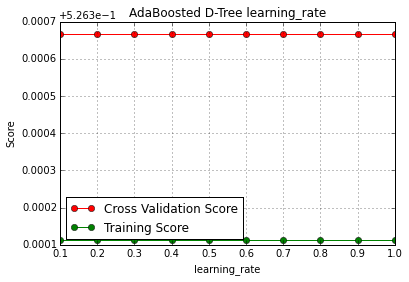

In [21]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("AdaBoosted D-Tree learning_rate")
plt.xlabel("learning_rate")
plt.ylabel("Score")

plt.grid()

plt.plot(adaGS.param_grid['learning_rate'], adaGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
plt.plot(adaGS.param_grid['learning_rate'], adaGS.cv_results_['mean_train_score'], 'o-', color="g",
         label="Training Score")
plt.legend(loc="best")

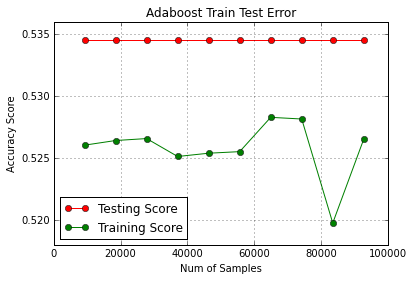

In [23]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = x
    yTrainRound = y
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(x, y, test_size=i/10.0)
    
    dt = DecisionTreeClassifier(splitter='best', presort = False, min_impurity_decrease= 0.1, min_samples_leaf = 1)
    dt.fit(xTrainRound, yTrainRound)
    prune(dt, 10)
    ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 200, learning_rate = 0.1)
    ada.fit(xTrainRound, yTrainRound)
    
    trainPredRes = ada.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = ada.predict(testX)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(testY, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("Adaboost Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# ADA detailed results
dt = DecisionTreeClassifier(splitter='best', presort = False, min_impurity_decrease= 0.1, min_samples_leaf = 1)
dt.fit(x, y)
prune(dt, 10)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 200, learning_rate = 0.1)
ada.fit(x, y)

adaPredicted = ada.predict(testX)
print metrics.classification_report(testY, adaPredicted)
adaPredicted = pd.DataFrame(data=adaPredicted, columns=['team'])
print adaPredicted.team.value_counts()

In [ ]:
# Code here is the algorithm tuning zone will be commented out takes a long time to run

svc = SVC()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
parameters = {'kernel': ('linear', 'rbf', 'poly')} 
svcGS= GridSearchCV(svc, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
svcGS.fit(x, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] kernel=linear ...................................................
[CV] kernel=linear ...................................................
[CV] kernel=linear ...................................................
[CV] kernel=linear ...................................................
[CV] kernel=linear ...................................................
[CV] kernel=rbf ......................................................
[CV] kernel=rbf ......................................................
[CV] kernel=rbf ......................................................
[CV] ................ kernel=rbf, score=0.598111171074, total=107.1min
[CV] kernel=rbf ......................................................
[CV] ................ kernel=rbf, score=0.595304910955, total=107.2min
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 163.7min remaining: 1064.0min


[CV] ................ kernel=rbf, score=0.599676200756, total=109.8min
[CV] kernel=poly .....................................................
[CV] ................ kernel=rbf, score=0.594495412844, total=103.8min
[CV] kernel=poly .....................................................


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 320.3min remaining: 880.8min


[CV] ................ kernel=rbf, score=0.596114409066, total=106.7min
[CV] kernel=poly .....................................................
[CV] ............. kernel=linear, score=0.602536427415, total=590.1min
[CV] kernel=poly .....................................................


[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 642.4min remaining: 963.6min


[CV] ............. kernel=linear, score=0.597571505666, total=593.4min
[CV] kernel=poly .....................................................
[CV] ............... kernel=linear, score=0.5985429034, total=593.6min


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 646.0min remaining: 565.2min


[CV] ............. kernel=linear, score=0.604047490556, total=596.0min
[CV] ............. kernel=linear, score=0.606637884512, total=597.8min


[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 649.3min remaining: 324.7min


[CV] ............... kernel=poly, score=0.589314624933, total=892.3min
[CV] ............... kernel=poly, score=0.589260658392, total=813.4min


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 1145.4min remaining: 286.3min


[CV] ............... kernel=poly, score=0.588720992984, total=865.8min
[CV] ............... kernel=poly, score=0.595250944414, total=612.2min
[CV] ............... kernel=poly, score=0.587263896384, total=638.2min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 1285.3min finished


In [ ]:
# Printouts --
print(svcGS.best_score_)
print(svcGS.best_estimator_.kernel)
print svcGS.param_grid['kernel']
print(svcGS.cv_results_['mean_test_score'])
print(svcGS.cv_results_['mean_train_score'])

In [ ]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("SVC  Dota2 Dataset")
plt.xlabel("Power Parameter")
plt.ylabel("Score")

plt.grid()

plt.plot(svcGS.param_grid['p'], svcGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
plt.plot(svcGS.param_grid['p'], svcGS.cv_results_['mean_train_score'], 'o-', color="g",
         label="Training Score")
plt.legend(loc="best")

Linear Done
RBF Done


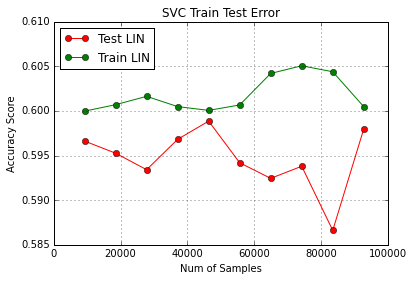

In [10]:
## TRAIN TEST GRAPH ## TAKES HOURS TO RUN 
sampleNum = []
trainScoreArr1 = []
testScoreArr1 = []
trainScoreArr2 = []
testScoreArr2 = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = x
    yTrainRound = y
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(x, y, test_size=i/10.0)
    
    svc = SVC(kernel= 'linear')
    svc.fit(xTrainRound, yTrainRound)
    
    trainPredRes = svc.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = svc.predict(testX)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(testY, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr1.append(trainAcc)
    testScoreArr1.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    
print "Linear Done"
# for i in range (1, 11):
#     xTrainRound = x
#     yTrainRound = y
#     if i < 10:
#         xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(x, y, test_size=i/5.0)
    
#     svc = SVC(kernel= 'rbf', verbose = True)
#     svc.fit(xTrainRound, yTrainRound)
    
#     trainPredRes = svc.predict(xTrainRound)
#     trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
#     trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
#     testPredRes = svc.predict(testX)
#     testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
#     testAcc = accuracy_score(testY, testPredRes)
    
#     if testAcc > bestScore:
#         index = i
#         bestScore = testAcc
#     trainScoreArr2.append(trainAcc)
#     testScoreArr2.append(testAcc)
    
print "RBF Done"

plt.figure()
plt.title("SVC Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(sampleNum, testScoreArr1, 'o-', color="r", label = "Test LIN")
plt.plot(sampleNum, trainScoreArr1, 'o-', color="g", label = "Train LIN")
# plt.plot(sampleNum, testScoreArr2, 'o-', color="y", label = "Test RBF")
# plt.plot(sampleNum, trainScoreArr2, 'o-', color="m", label = "Train RBF")
plt.legend(loc="best")


In [ ]:
# SVC detailed results
svc = SVC(kernel= 'linear')
svc.fit(x, y)

svcPredicted = mlp.predict(testX)
print metrics.classification_report(testY, svcPredicted)
svcPredicted = pd.DataFrame(data=svcPredicted, columns=['team'])
print svcPredicted.team.value_counts()

In [131]:
knn = KNeighborsClassifier()
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
# Code here is the algorithm tuning zone will be commented out takes a long time to run ## DO NOT RUN

knn = KNeighborsClassifier(leaf_size = 80, n_neighbors=350, p=2)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# parameters = {'n_neighbors': (np.arange(50, 500, 50))} 
# parameters = {'leaf_size': (np.arange(10, 100, 10))}
parameters = {'p' : (np.arange(1, 4))}
knnGS = GridSearchCV(knn, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
knnGS.fit(x, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] p=1 .............................................................
[CV] p=1 .............................................................
[CV] p=1 .............................................................
[CV] p=1 .............................................................
[CV] p=1 .............................................................
[CV] p=2 .............................................................
[CV] p=2 .............................................................
[CV] p=2 .............................................................
[CV] ........................ p=2, score=0.564867781975, total= 4.3min
[CV] p=2 .............................................................
[CV] ........................ p=2, score=0.560442525634, total= 4.2min
[CV] p=2 .............................................................


[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 21.4min remaining: 139.1min


[CV] ........................ p=2, score=0.562385321101, total= 4.3min
[CV] p=3 .............................................................
[CV] ........................ p=1, score=0.557150566649, total= 7.6min
[CV] p=3 .............................................................


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 39.0min remaining: 107.3min


[CV] ........................ p=1, score=0.560280626012, total= 7.6min
[CV] p=3 .............................................................
[CV] ........................ p=1, score=0.563248785753, total= 7.7min
[CV] p=3 .............................................................


[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 39.1min remaining: 58.7min


[CV] ........................ p=1, score=0.562277388019, total= 7.7min
[CV] p=3 .............................................................
[CV] ........................ p=1, score=0.565731246627, total= 7.7min


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 39.4min remaining: 34.4min


[CV] ........................ p=2, score=0.564328116568, total= 4.2min
[CV] ........................ p=2, score=0.562871019968, total= 4.6min


[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 41.5min remaining: 20.8min


[CV] ........................ p=3, score=0.565461413923, total=19.5min
[CV] ........................ p=3, score=0.559093362115, total=14.9min


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 108.5min remaining: 27.1min


[CV] ........................ p=3, score=0.563464651916, total=14.5min
[CV] ........................ p=3, score=0.557420399352, total=14.6min
[CV] ........................ p=3, score=0.557582298975, total=14.4min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 109.9min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=80, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=350, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'p': array([1, 2, 3])}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=10)

/home/kristian/venv/data-science/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


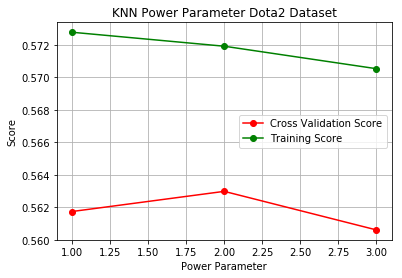

In [5]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("KNN Power Parameter Dota2 Dataset")
plt.xlabel("Power Parameter")
plt.ylabel("Score")

plt.grid()

plt.plot(knnGS.param_grid['p'], knnGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
plt.plot(knnGS.param_grid['p'], knnGS.cv_results_['mean_train_score'], 'o-', color="g",
         label="Training Score")
plt.legend(loc="best")

In [7]:
# Printouts -- TO BE REMOVED
print(knnGS.best_score_)
print(knnGS.best_estimator_.p)
print knnGS.param_grid['p']
print(knnGS.cv_results_['mean_test_score'])
print(knnGS.cv_results_['mean_train_score'])

0.562978953049
2
[1 2 3]
[ 0.56173772  0.56297895  0.56060443]
[ 0.57277891  0.57191813  0.57053387]


In [7]:
nnParam = [50,60,70,80,90,100,110,120,130,140]
nnScore = [ 0.54756611, 0.54765246 ,0.5503184  ,0.55109552,  0.55184026, 0.5529088 ,0.55357798 ,0.5556395, 0.55722612, 0.55671883]
nnTrain = [0, 0, 0, 0, 0, 0.58380172, 0.58243365, 0.58160256, 0.5803775, 0.57954101]
lsParam = [10, 20, 30, 40, 50, 60, 70, 80, 90]
lsScore = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.7]
lsScore = [ 0.52411225 , 0.52422018,  0.52422018 , 0.523864  ,  0.523864, 0.523864, 0.523864,0.52431732,0.52431732]
lsTrain = [ 0.70109419, 0.70096197, 0.70096197, 0.70094578, 0.70094578, 0.70094578, 0.70094578, 0.70111307, 0.70111307]

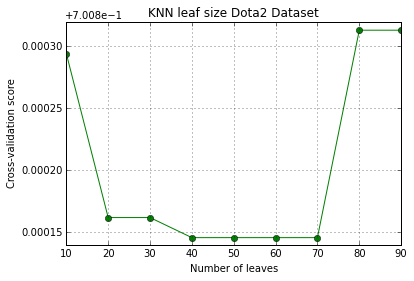

In [8]:
plt.figure()
plt.title("KNN leaf size Dota2 Dataset")
plt.xlabel("Number of leaves")
plt.ylabel("Cross-validation score")

plt.grid()

# plt.plot(lsParam, lsScore, 'o-', color="r")
plt.plot(lsParam, lsTrain, 'o-', color="g")

<module 'matplotlib.pyplot' from '/home/kristian/venv/data-science/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

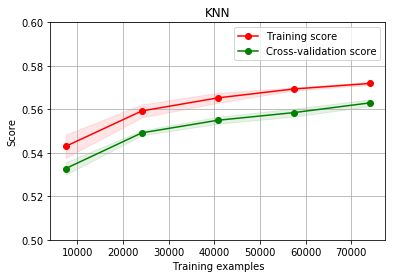

In [12]:
knn = KNeighborsClassifier(leaf_size = 80, n_neighbors=350, p=2)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(knn, "KNN", x, y, (0.5, 0.6), cv=cv, n_jobs=-1)

In [10]:
knn = KNeighborsClassifier()
knn.fit(x, y)
knnPred = knn.predict(testX)
print metrics.classification_report(testY, knnPred)

             precision    recall  f1-score   support

         -1       0.49      0.48      0.49      4791
          1       0.56      0.57      0.56      5502

avg / total       0.53      0.53      0.53     10293



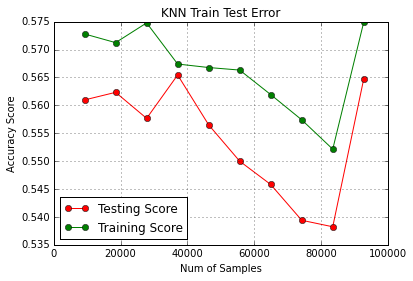

In [24]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = x
    yTrainRound = y
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(x, y, test_size=i/10.0)
    
    knn = KNeighborsClassifier(leaf_size = 80, n_neighbors=350, p=2)
    knn.fit(xTrainRound, yTrainRound)
    
    trainPredRes = knn.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = knn.predict(testX)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(testY, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("KNN Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# KNN detailed results
knn = KNeighborsClassifier(leaf_size = 80, n_neighbors=350, p=2)
knn.fit(x, y)

knnPredicted = knn.predict(testX)
print metrics.classification_report(testY, knnPredicted)
knnPredicted = pd.DataFrame(data=knnPredicted, columns=['team'])
print knnPredicted.team.value_counts()